# Importing Required Liabraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading Dataset

In [4]:
df = pd.read_csv("TATAMOTORS.NS.csv")

# Checking top 5 Records
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-05,347.049988,350.100006,344.000000,346.100006,346.100006,18399524
1,2021-07-06,348.000000,358.200012,311.500000,316.899994,316.899994,164083830
2,2021-07-07,316.000000,319.100006,306.250000,317.100006,317.100006,112183313
3,2021-07-08,314.799988,314.799988,305.000000,306.350006,306.350006,87360324
4,2021-07-09,305.799988,308.850006,301.850006,306.299988,306.299988,48807214


<AxesSubplot:>

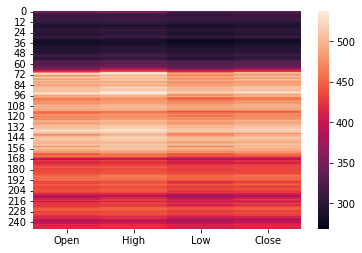

In [32]:
sns.heatmap(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


* INFO:

* In This Dataset we have total 247 Records.
* Except Date Column all columns have numeric datatype.
* There is no null/missing value present in our dataset.

In [6]:
# Checking Statistical report of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,418.648185,424.855243,411.253427,417.729235,417.729235,2.876586e+07
std,76.016049,77.314809,74.280535,75.706679,75.706679,2.357703e+07
min,278.500000,281.500000,268.450012,276.950012,276.950012,5.531940e+06
25%,340.937508,349.750008,335.112496,340.512497,340.512497,1.630408e+07
50%,434.399994,438.750000,427.949997,433.025009,433.025009,2.207457e+07
75%,484.875000,494.174996,476.187492,486.300003,486.300003,3.073090e+07
max,531.450012,536.700012,520.250000,530.150024,530.150024,1.979494e+08


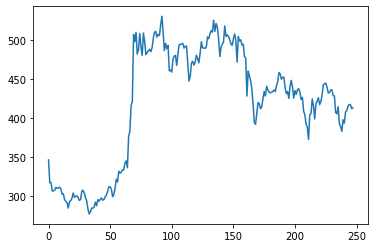

In [5]:
plt.plot(df["Close"])

<AxesSubplot:xlabel='Open', ylabel='Close'>

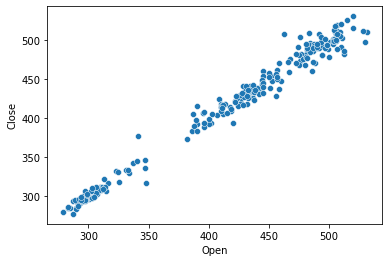

In [31]:
sns.scatterplot(df["Open"],df["Close"])

# There is positive relation between open-price and close the price

# Checking for outliers present in columns

<AxesSubplot:xlabel='Open'>

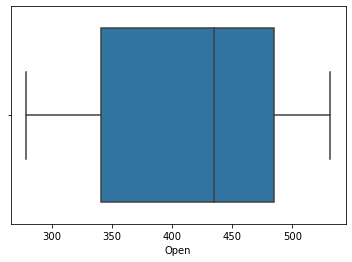

In [17]:
sns.boxplot(df["Open"])

sns.boxplot(df["Close"],color="green")


<AxesSubplot:xlabel='High'>

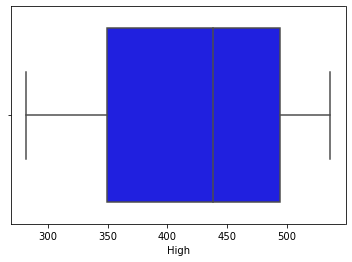

In [22]:
sns.boxplot(df["High"],color="blue")

<AxesSubplot:xlabel='Low'>

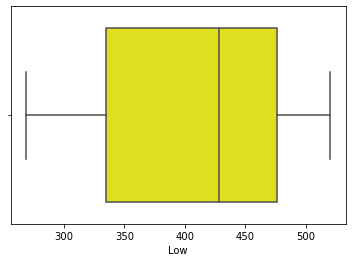

In [24]:
sns.boxplot(df["Low"],color="yellow")

* After Understanding boxplot for all columns we know that our data is normally distributed.
* There is no outliers present in our dataset

In [25]:
# Deleting unneccesary columns from dataset

df.drop(["Date","Adj Close","Volume"],axis=1,inplace=True)

In [26]:
df.head() # Final Dataset

,Open,High,Low,Close
0,347.049988,350.100006,344.000000,346.100006
1,348.000000,358.200012,311.500000,316.899994
2,316.000000,319.100006,306.250000,317.100006
3,314.799988,314.799988,305.000000,306.350006
4,305.799988,308.850006,301.850006,306.299988


In [28]:
df.info()

# in final datset we have all the columns with numeric type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    248 non-null    float64
 1   High    248 non-null    float64
 2   Low     248 non-null    float64
 3   Close   248 non-null    float64
dtypes: float64(4)
memory usage: 7.9 KB


# Model Building Process

In [29]:
# Seperating x and y 
# Where x contains all the features 
# y contains output/target column values.

x = df.iloc[:,:-1]
x

,Open,High,Low
0,347.049988,350.100006,344.000000
1,348.000000,358.200012,311.500000
2,316.000000,319.100006,306.250000
3,314.799988,314.799988,305.000000
4,305.799988,308.850006,301.850006
...,...,...,...
243,417.549988,419.450012,412.350006
244,411.299988,418.200012,409.149994
245,412.049988,419.899994,411.549988
246,418.299988,424.000000,410.000000


In [30]:
y = df["Close"]
y

0      346.100006
1      316.899994
2      317.100006
3      306.350006
4      306.299988
          ...    
243    414.500000
244    417.100006
245    416.950012
246    411.799988
247    412.700012
Name: Close, Length: 248, dtype: float64

# About Model Selection

* This is supervised machine learning regression problem.
* Our Data is linearly well seperable and there is positive relationship between our features.
* Using linear regression model we are getting better result comparing other algorithms we choose final model on Linear Regression Alogorithm.

# Linear Regression Model

In [35]:
# Passing the data for training and testing

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [36]:
#Final Model
from sklearn.linear_model import LinearRegression

# Object for Linear Regression class
lr = LinearRegression()

# fitting trainig data
lr.fit(xtrain,ytrain)

# fitting prediction data
ypred = lr.predict(xtest)

ypred

array([413.00546728, 406.96504341, 382.29031534, 445.12983241,
       511.17264181, 430.6602005 , 328.03322172, 486.74643353,
       431.92409332, 304.96073379, 498.22377293, 499.28020363,
       490.21052228, 489.69814509, 422.85205529, 479.09887092,
       437.92984065, 309.8357469 , 305.20826631, 485.43086301,
       442.28442306, 273.05658737, 473.08218679, 437.70143699,
       466.25099514, 462.88841619, 414.714213  , 480.21165763,
       292.4252562 , 419.28859245, 428.4397784 , 292.5200428 ,
       340.39844583, 410.37780581, 473.69222986, 500.16420246,
       287.33635212, 294.02686668, 298.01329789, 405.49982089,
       478.73337688, 296.35261746, 457.73221821, 434.37249342,
       278.56116361, 521.80559695, 287.46762156, 302.97431069,
       304.97158338, 346.79861782, 423.00351208, 477.5994699 ,
       429.6143379 , 502.63420378, 500.22808177, 468.86030992,
       509.97938809, 306.30415494, 285.59074576, 388.70363248,
       405.62992807, 458.25842653, 456.96817662, 391.88

In [37]:
#Comparision of actual and predicted values
pd.DataFrame(data={"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
67,415.750000,413.005467
247,412.700012,406.965043
210,388.149994,382.290315
224,443.549988,445.129832
90,505.450012,511.172642
...,...,...
88,503.450012,509.700340
171,418.149994,414.465988
236,392.950012,397.470471
114,447.049988,444.212244


In [43]:
# Checking the accuracy of our model by using eveluation metrics of classification algorithm

from sklearn.metrics import r2_score

print("Accuracy of our Model:",r2_score(ytest,ypred))

Accuracy of our Model: 0.9984354875341526


In [ ]:
#Passing New Observation 

# Actual Prices of Tata Motors Share taken as input

Open
411.55
High
414.90
Low
405.00

Close price on 04/07/2022
Close
408

In [39]:
openp = float(input("Enter Open Price: "))
High = float(input("Enter Close Price: "))
low  = float(input("Enter Low price"))

Enter Open Price: 411.55
Enter Close Price: 414.90
Enter Low price405


In [41]:
lr.predict([[openp,High,low]])  

# The Close Price is correctly predicted by our model

array([408.74019835])